### Rossman Sales Prediction

Abstract:
    The main aim of the notebook is to predict Sales price of various Store Types of Rossman. The Dataset consists  of various factors such as number of customers for each store,no of 1st promotion offered by the store,Number of Stores that offer 2nd promotion followed by 1st promotion,Effect of Sales due to School& State Holiday,distance of Competition Stores from the current store that effect the Sales of the store.

Steps:
1) Data Cleaning
2) Exploratory Data Analysis
3) Feature Selection
4) Model Building

### 1. Import Packages

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#import plotly 
import plotly.graph_objs as go
import sklearn
import warnings

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore")

### 2. Data Preparation

In [303]:
# Load Datasets from the folder
import zipfile
zf = zipfile.ZipFile(r"C:\Users\sharmi\Desktop\IIIT-B\FinalProject\Dataset.zip")
store = pd.read_csv(zf.open('store.csv'))
train = pd.read_csv(zf.open('train.csv'))

In [304]:
data = pd.DataFrame(train)
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [305]:
# modify the date format
data['Date'] = pd.to_datetime(data.Date)
data.head().append(data.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [306]:
# sort date to bring oldest first
data= data.sort_values(by= ['Date','Store'])
data= data.reset_index(drop= True)
data.head().append(data.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2013-01-01,0,0,0,0,a,1
1,2,2,2013-01-01,0,0,0,0,a,1
2,3,2,2013-01-01,0,0,0,0,a,1
3,4,2,2013-01-01,0,0,0,0,a,1
4,5,2,2013-01-01,0,0,0,0,a,1
1017204,1111,5,2015-07-31,5723,422,1,1,0,1
1017205,1112,5,2015-07-31,9626,767,1,1,0,1
1017206,1113,5,2015-07-31,7289,720,1,1,0,1
1017207,1114,5,2015-07-31,27508,3745,1,1,0,1
1017208,1115,5,2015-07-31,8680,538,1,1,0,1


In [307]:
#inspect the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [308]:
store.head().append(store.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [309]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

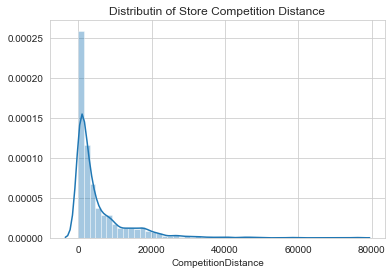

In [310]:
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

From the graph, we observed the distribution is right skewed, so we'll replace missing values with the median.

In [311]:
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

In [312]:
# fillna in store with 0
store.fillna(0, inplace=True)

In [313]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


#### Filter stores - 1,3,8,9,13,25,29,31 and 46

In [314]:
stores = [1,3,8,9,13,25,29,31,46]
data = data[data.Store.isin(stores)]
data.head(9)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2013-01-01,0,0,0,0,a,1
2,3,2,2013-01-01,0,0,0,0,a,1
7,8,2,2013-01-01,0,0,0,0,a,1
8,9,2,2013-01-01,0,0,0,0,a,1
12,13,2,2013-01-01,0,0,0,0,a,1
24,25,2,2013-01-01,0,0,0,0,a,1
28,29,2,2013-01-01,0,0,0,0,a,1
30,31,2,2013-01-01,0,0,0,0,a,1
45,46,2,2013-01-01,0,0,0,0,a,1


In [315]:
# drop rows with Shop is closed (open value 0) or Sales is zero.
data = data.loc[~(data['Sales']==0)]

# evaluate the number of rows left in each store
data.Store.value_counts().sort_index()

1     781
3     779
8     784
9     779
13    621
25    750
29    779
31    784
46    622
Name: Store, dtype: int64

In [316]:
data.shape

(6679, 9)

In [317]:
# inspect any rows with Sales value as 0
data[data['Sales']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [318]:
data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [319]:
#Group data storewise
store_df = []

for i in stores:
    store_df.append(data[data['Store'] == i])
  
for temp_df in store_df:
    temp_df['Date'] = pd.date_range(start = '2013-01-01', periods = len(temp_df), freq= 'D') # resequencing the date column, 
                                                                                             # as some date are missing due to dropping of rows
    temp_df.drop('Open',axis = 1,inplace = True) # now we have all stores open , there is only one value in Open column, so drop it.

for temp_df in store_df:
    print(temp_df.head(10))

       Store  DayOfWeek       Date  Sales  Customers  Promo StateHoliday  \
1114       1          3 2013-01-01   5530        668      0            0   
2229       1          4 2013-01-02   4327        578      0            0   
3344       1          5 2013-01-03   4486        619      0            0   
4459       1          6 2013-01-04   4997        635      0            0   
6689       1          1 2013-01-05   7176        785      1            0   
7804       1          2 2013-01-06   5580        654      1            0   
8919       1          3 2013-01-07   5471        626      1            0   
10034      1          4 2013-01-08   4892        615      1            0   
11149      1          5 2013-01-09   4881        592      1            0   
12264      1          6 2013-01-10   4952        646      0            0   

       SchoolHoliday  
1114               1  
2229               1  
3344               1  
4459               1  
6689               1  
7804               1  
89

Observation :

No more rows with zero Sales value.
Date are in continuity

In [320]:
store_ts = []
for i in range(len(store_df)):
    store_df[i]['Date'] = pd.to_datetime(store_df[i]['Date'],format = "%Y-%m-%d")
    store_ts.append(pd.DataFrame(store_df[i][['Date','Store','Sales','Customers','DayOfWeek','Promo','SchoolHoliday','StateHoliday']]).set_index('Date'))

store_ts[0].head()

,Store,Sales,Customers,DayOfWeek,Promo,SchoolHoliday,StateHoliday
Date,,,,,,,
2013-01-01,1,5530,668,3,0,1,0
2013-01-02,1,4327,578,4,0,1,0
2013-01-03,1,4486,619,5,0,1,0
2013-01-04,1,4997,635,6,0,1,0
2013-01-05,1,7176,785,1,1,1,0


In [321]:
# merge two dataframe - merged_df = df1
df1 = pd.merge(train,store, on = 'Store', how = 'inner')
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


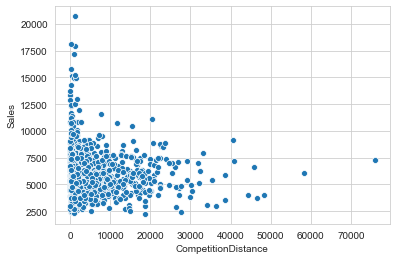

In [322]:
# group dataset Store wise comparing Sales and Competition distance
df_dist = df1.groupby('Store')[['Sales','CompetitionDistance']].mean()


# Analysing how competition distance impacting Sales
sns.scatterplot(df_dist['CompetitionDistance'],df_dist['Sales'])
plt.show()

Observation:
- There is not much impact of competition distance on Sales.
- The maximum sales has very close competitior.

In [323]:
# Analysing the Sales and Promo2 for different stores
promo0 = df1.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = df1.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

Text(0, 0.5, 'Sales')

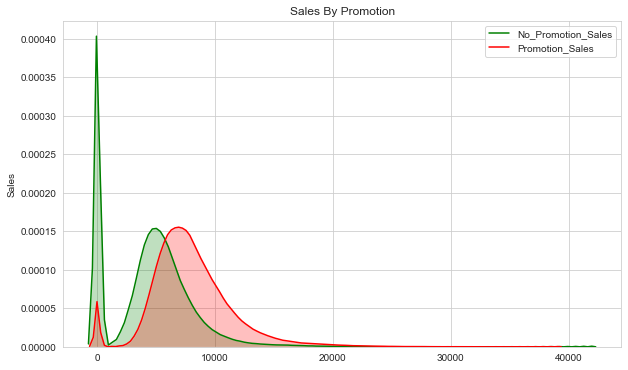

In [324]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(x1, shade=True, color="g")
ax = sns.kdeplot(x2, shade=True, color="r")
plt.title("Sales By Promotion")
plt.ylabel('Sales')

Observation:

We can see that most of the stores have higher sales even the promotion is not continued.

In [325]:
# Correlation Heatmap
corr = df1.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

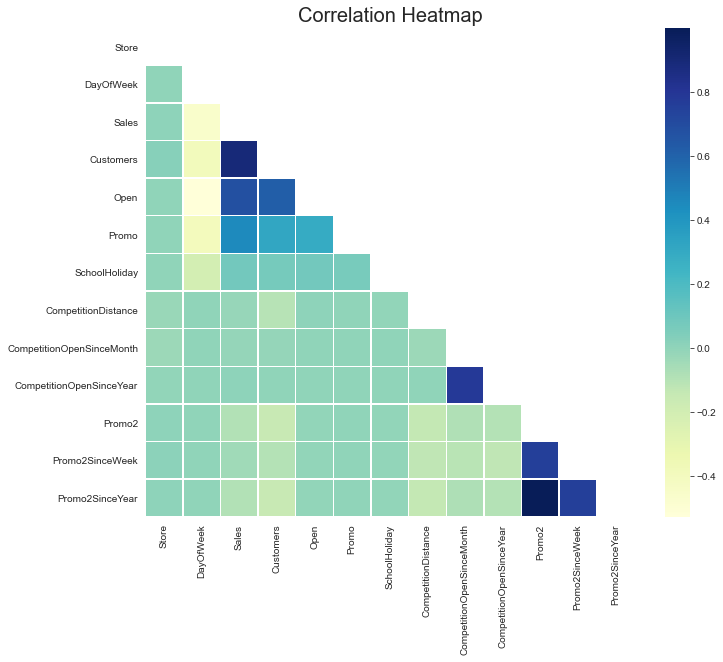

In [326]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask, square = True, linewidths = .5, ax = ax, cmap = "YlGnBu")
plt.title("Correlation Heatmap", fontsize=20)

Sales and customers are highly correlated

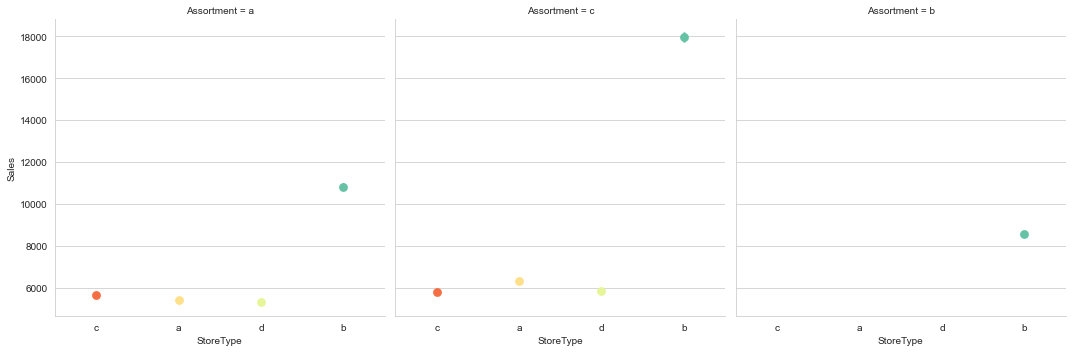

In [327]:
#Sales by storetype
sns.factorplot(data = df1, x = 'StoreType', y = "Sales", 
               col = 'Assortment',
               palette = 'Spectral',
               hue = 'StoreType')

In [328]:
df1.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

we are going to map all holidays a, b, c as 1 and 0 for non - holidays

In [329]:
df1["StateHoliday"] = df1["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

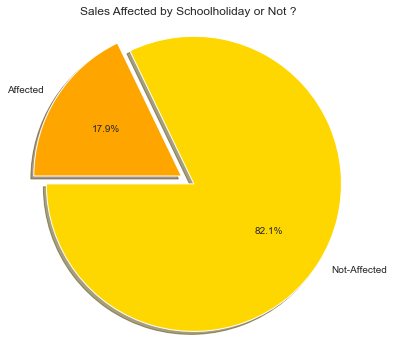

In [330]:
labels = 'Not-Affected' , 'Affected'
sizes = df1.SchoolHoliday.value_counts()
colors = ['gold', 'orange']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

SChool Holiday affect the sales

In [331]:
temp = []
for i in df1.groupby('Store')[["Sales", "Customers"]].mean()["Sales"]:
  temp.append(i)
store["Sales"] = temp

In [332]:
def plotmaster(StringA , StringB):
  fig, axes = plt.subplots(2,1)
  fig.set_size_inches(12, 15)
  sns.barplot(x=StringA, y=StringB, data=store ,hue="StoreType", ax = axes[0])
  sns.boxplot(x=StringA, y=StringB, data=store ,hue="StoreType", ax=axes[1])

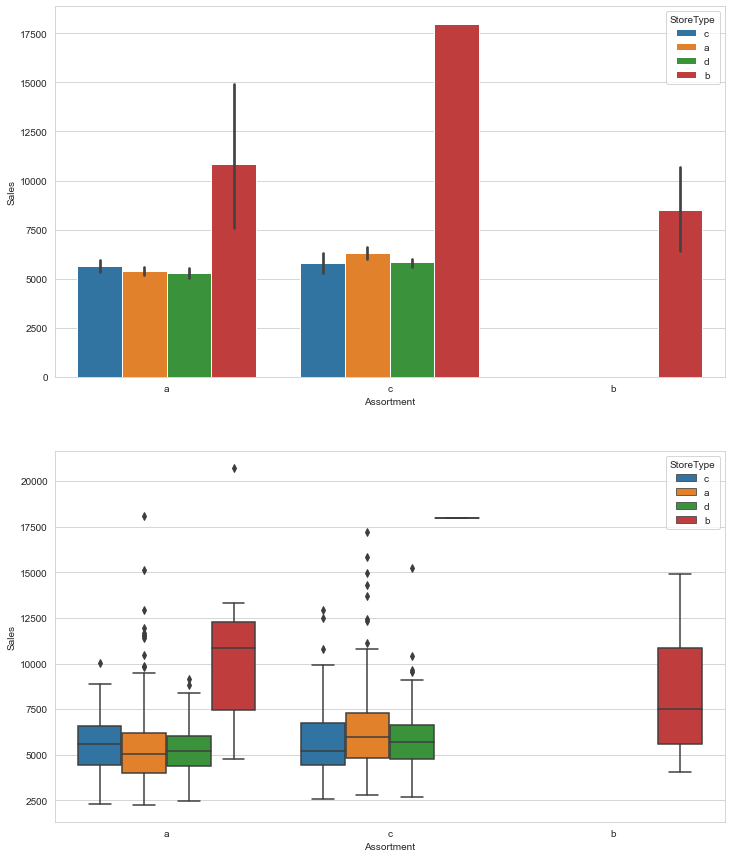

In [333]:
#Sales by Assortment
plotmaster("Assortment" , "Sales")

In [334]:
temp = []
for i in df1.groupby('Store')[["Sales", "Customers"]].mean()["Customers"]:
  temp.append(i)
store["Customers"] = temp

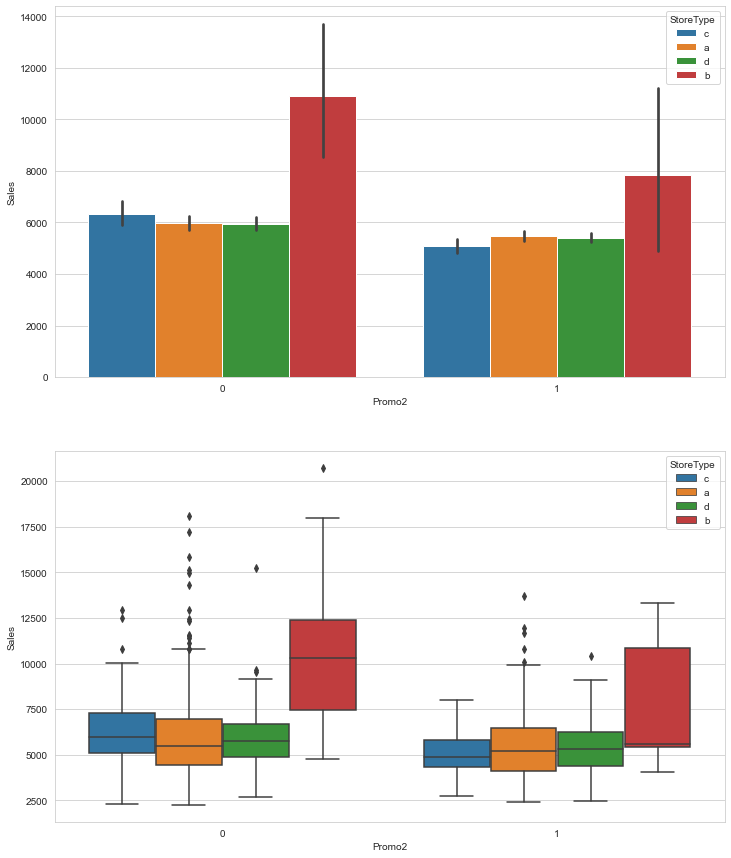

In [335]:
#sales by Promo2
plotmaster("Promo2" , "Sales")

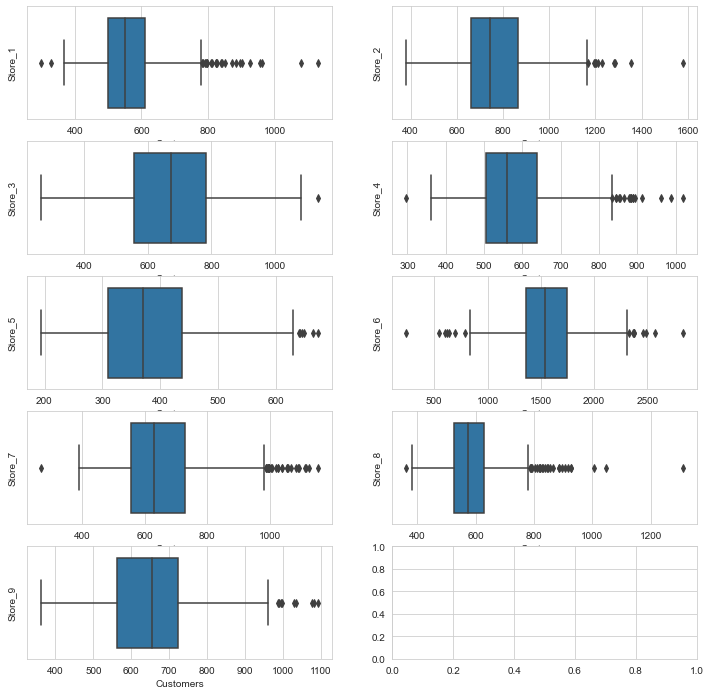

In [336]:
# Spread of Sales of all store
fig, axs = plt.subplots(figsize=(12, 12),nrows=5,ncols=2)
for i in range(9):
  axs[np.floor(i/2).astype('int')][i%2].set_ylabel("Store_"+str(i+1))
  sns.boxplot(x=store_ts[i]['Customers'],ax= axs[np.floor(i/2).astype('int')][i%2] )
plt.show()

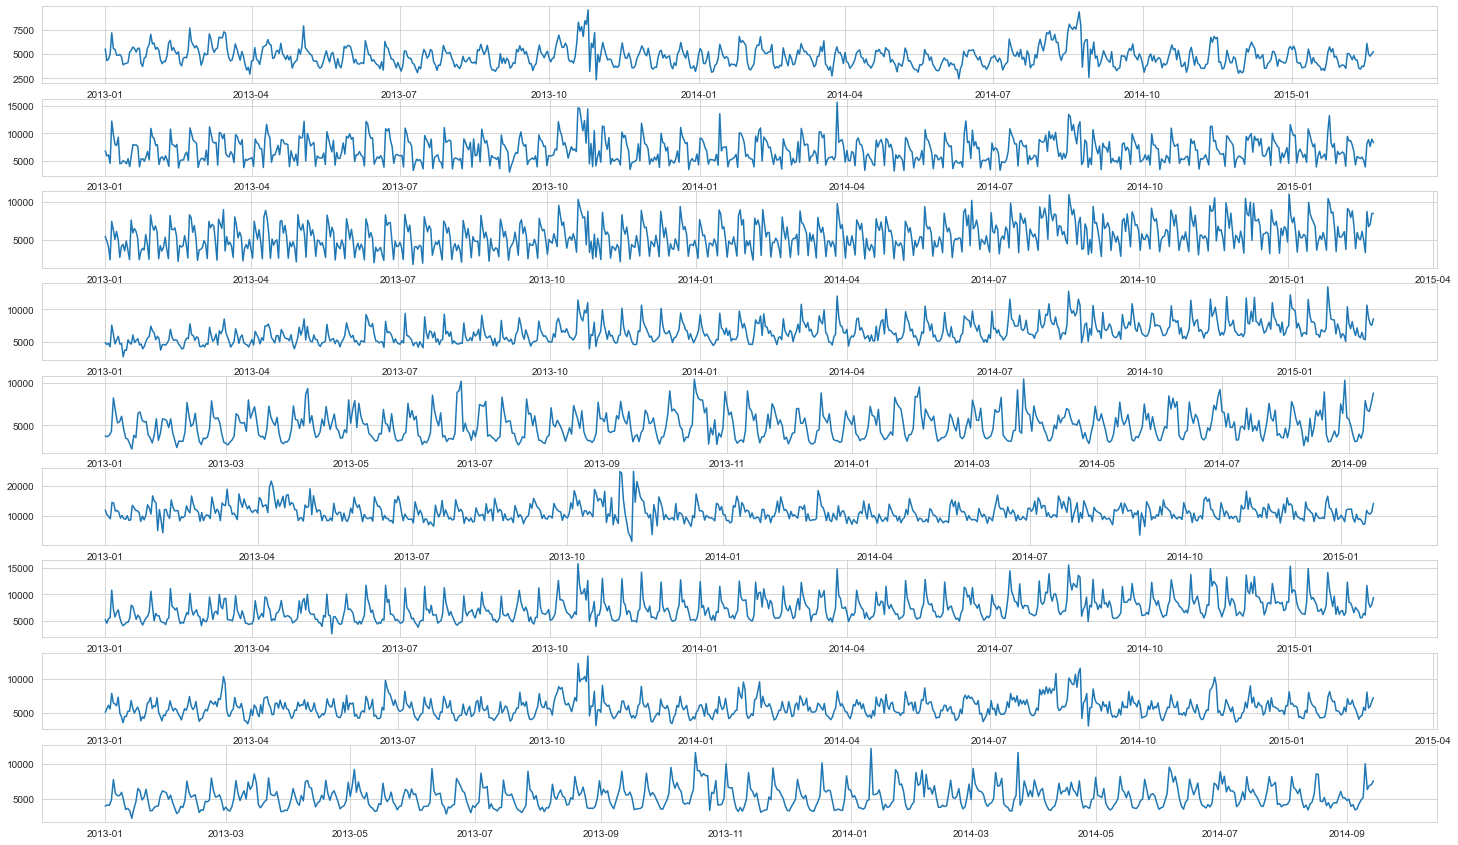

In [337]:
# Sales plot for all stores
plt.figure(figsize= [25,15]) 
plt.xlabel("Date")
plt.ylabel("Sales")
for i in range(9):
  plt.subplot(9,1,i+1)
  plt.plot(store_ts[i]['Sales'])
plt.show()

Observation:

More or less all Stores have no trend.

In [338]:
#defining the common method graph
def graph(y_hat, method_name):
    plt.figure(figsize=(20,4))
    plt.plot(train['Sales'], label = 'train')
    plt.plot(test['Sales'], label = 'test')
    plt.plot(y_hat, label = 'forecast')
    plt.legend(loc = 'best')
    plt.title(method_name)
    plt.show()

In [339]:
# A common result dataframe for all models. 
 
results = pd.DataFrame({'Method':[], 'MAPE': []})
results

,Method,MAPE


#### STORE 1

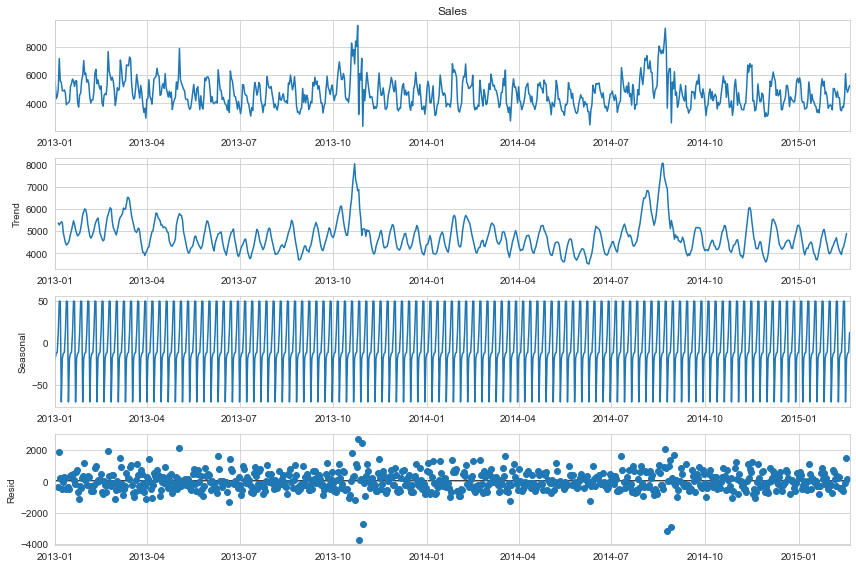

In [340]:
#Decomposition of time series data
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_ts[0]['Sales'],model = 'additive')
fig = decomposition.plot()
plt.show()

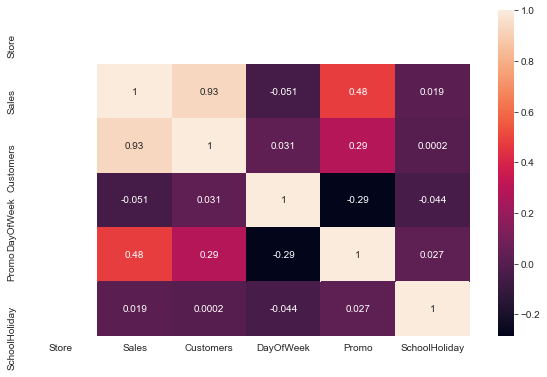

In [341]:
# Analyse the correlation
plt.figure(figsize=[10,6])
sns.heatmap(store_ts[0].corr(),annot=True)
plt.show()

Observation:
    Very high correlation between sales and customers

#### Data Preparation

In [342]:
#Splitting test and train data
train = store_ts[0][['Sales','Customers','DayOfWeek','Promo','SchoolHoliday','StateHoliday']][:-42]
test = store_ts[0][['Sales','Customers','DayOfWeek','Promo','SchoolHoliday','StateHoliday']][-42:]

In [343]:
len(train)

739

In [344]:
len(test)

42

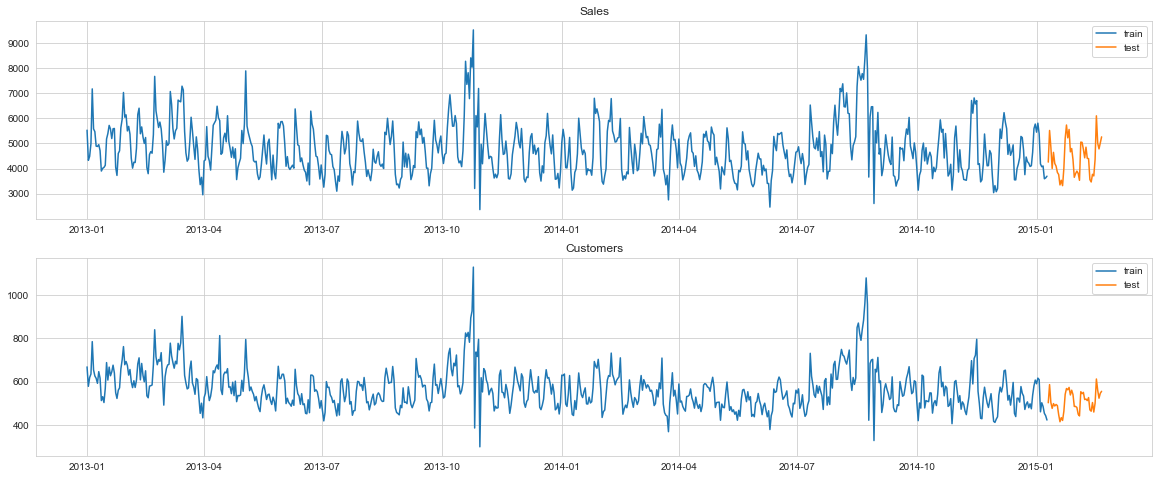

In [345]:
plt.figure(figsize = (20,8))
plt.subplot(211)
plt.plot(train['Sales'],label = 'train')
plt.plot(test['Sales'], label = 'test')
plt.title('Sales')
plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(train['Customers'],label = 'train')
plt.plot(test['Customers'],label = 'test')
plt.title('Customers')
plt.legend(loc = 'best')
plt.show()

#### Standardise the train data

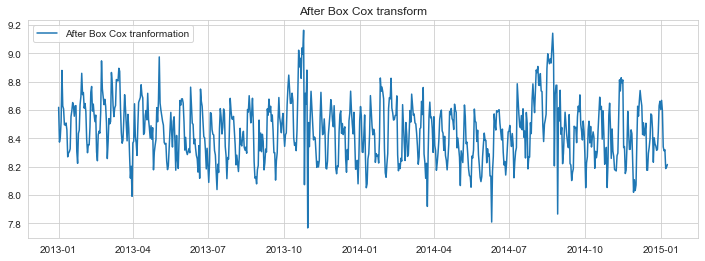

In [346]:
from scipy.stats import boxcox
train_boxcox = pd.DataFrame(boxcox(train['Sales'], lmbda=0), index = train.index, columns=['Sales'])
train_boxcox['Customers'] =  pd.Series(boxcox(train['Customers'], lmbda=0), index = train.index)

# plotting Sales after boxcox transformation
plt.figure(figsize=(12,4))
plt.plot(train_boxcox['Sales'], label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [347]:
#To check the stationarity of data
from statsmodels.tsa.stattools import adfuller

# Sales
adf_test = adfuller(train_boxcox['Sales'])

print("ADF Test for SALES")
print("ADF Statistics: %.3f" % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Test for SALES
ADF Statistics: -5.374
Critical value @ 0.05: -2.87
p-value: 0.000004


#### Model Building

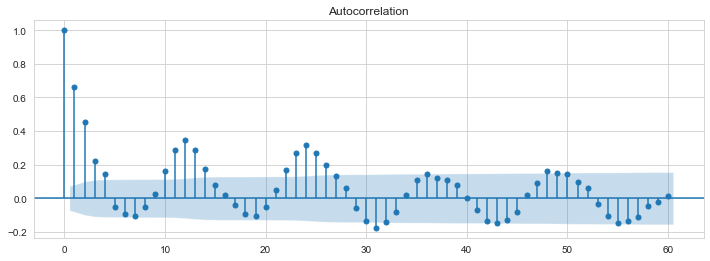

In [348]:
#AutoCorrelation function(ACF)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(train_boxcox['Sales'], ax=plt.gca(), lags = 60)
plt.show()

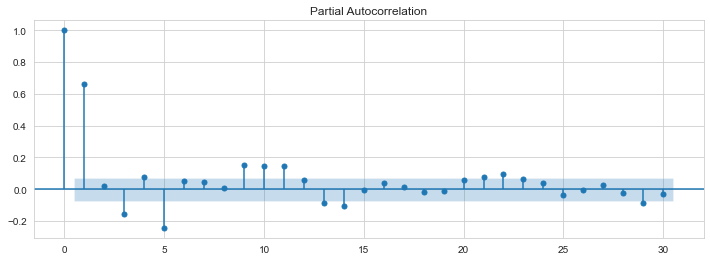

In [349]:
#Partial AutoCorrelation function(PACF) 
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(train_boxcox['Sales'], ax=plt.gca(), lags = 30)
plt.show()

In [350]:
#ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_boxcox['Sales'], order=(1, 0, 5))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  739
Model:                     ARMA(1, 5)   Log Likelihood                 365.042
Method:                       css-mle   S.D. of innovations              0.148
Date:                Sat, 20 Nov 2021   AIC                           -714.083
Time:                        22:21:07   BIC                           -677.241
Sample:                    01-01-2013   HQIC                          -699.877
                         - 01-09-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.4503      0.022    392.038      0.000       8.408       8.493
ar.L1.Sales     0.9668      0.025     38.601      0.000       0.918       1.016
ma.L1.Sales    -0.2722      0.044     -6.202    

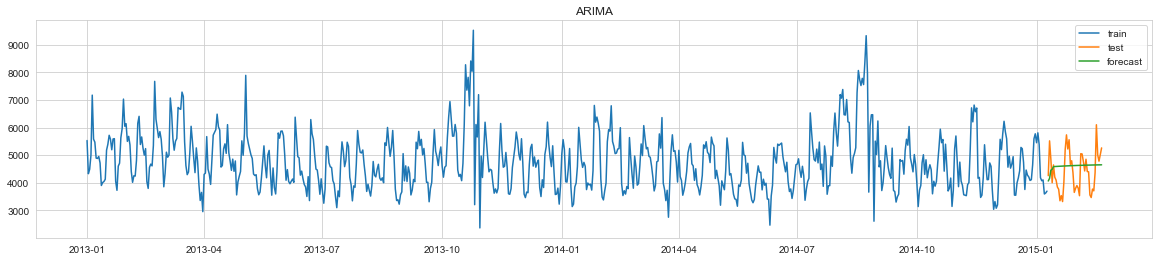

In [351]:
#Recover the original time series
y_hat_ar = store_ts[0]['Sales'].copy()
y_hat_ar['ar_forecast_boxcox'] = model_fit.predict(start = test.index.min(), end = test.index.max())
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

graph(y_hat_ar['ar_forecast'],"ARIMA")

In [352]:
#### Calculate RMSE, MAPE

In [353]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)
print('The Root mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))

The Root mean Squared Error of our forecasts is 744.55
The Mean Absolute Percentage Error of our forecasts is 15.15


In [354]:
tempResults = pd.DataFrame({'Method':['Store_1_ARIMA '],'MAPE': [mape]})
results = pd.concat([results, tempResults])

In [355]:
#### VAR Model

In [356]:
mod = sm.tsa.VARMAX(train_boxcox[['Sales', 'Customers']], order=(1,0), trend='n')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  739
Model:                             VAR(1)   Log Likelihood                1411.616
Date:                    Sat, 20 Nov 2021   AIC                          -2809.233
Time:                            22:21:13   BIC                          -2776.996
Sample:                        01-01-2013   HQIC                         -2796.803
                             - 01-09-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):              241.80, 193.95   Jarque-Bera (JB):        1866.70, 5.52
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.06
Heteroskedasticity (H):         1.38, 1.12   Skew:                     -0.61, -0.05
Prob(H) (two-sided):            0.01, 0.39   Kurtosis:                  10.69, 3.41


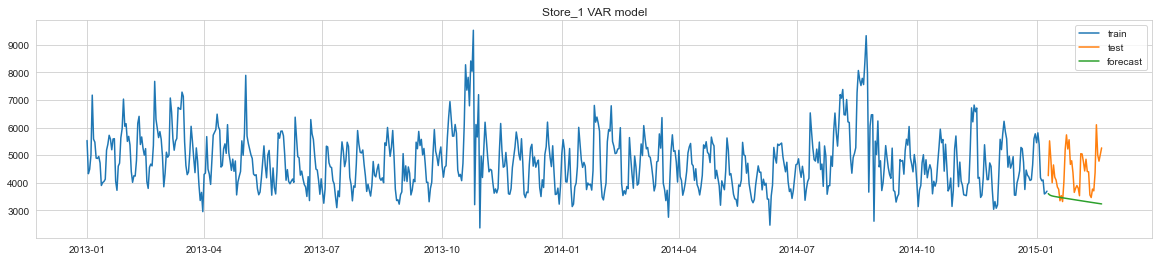

In [357]:
# forecast
start_index = test['Sales'].index.min()
end_index = test['Sales'].index.max()
y_hat_var = mod.fit().predict(start=start_index, end=end_index)
y_hat_var = np.exp(y_hat_var)
graph(y_hat_var['Sales'],"Store_1 VAR model")

In [358]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_var['Sales'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_var['Sales'][test.index.min():])/test['Sales'])*100,2)
print('The Root mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))
tempResults = pd.DataFrame({'Method':['Store_1_VAR'],'MAPE': [mape]})
results = pd.concat([results, tempResults])

The Root mean Squared Error of our forecasts is 1260.57
The Mean Absolute Percentage Error of our forecasts is 21.76


#### Varmax model

In [359]:
exog = train['SchoolHoliday']
mod_varmax = sm.tsa.VARMAX(train_boxcox[['Sales', 'Customers']],exog= exog, order=(4,0), trend='c')
resmax = mod_varmax.fit(maxiter=1000, disp=False)
print(resmax.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  739
Model:                            VARX(4)   Log Likelihood                1555.080
                              + intercept   AIC                          -3064.161
Date:                    Sat, 20 Nov 2021   BIC                          -2958.239
Time:                            22:22:09   HQIC                         -3023.319
Sample:                        01-01-2013                                         
                             - 01-09-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):               170.03, 66.58   Jarque-Bera (JB):        408.62, 20.28
Prob(Q):                        0.00, 0.01   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.28, 1.27   Skew:                     -0.37, -0.07
P

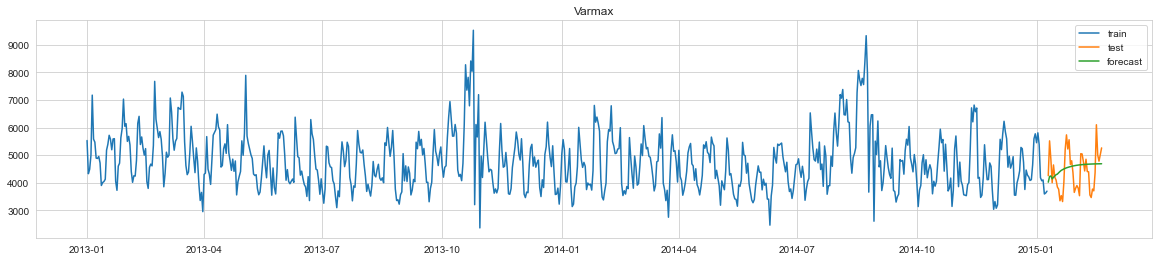

In [360]:
start_index = test['Sales'].index.min()
end_index = test['Sales'].index.max()
y_hat_varmax = resmax.predict(start=start_index, end=end_index,exog = np.array(exog[-42:]).reshape(42,1))
y_hat_varmax = np.exp(y_hat_varmax)
graph(y_hat_varmax['Sales'],"Varmax")

In [361]:
#MAPE And RMSE calculation
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_varmax['Sales'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_varmax['Sales'][test.index.min():])/test['Sales'])*100,2)
print('The Root mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))
tempResults = pd.DataFrame({'Method':['Store_1_VARMAX_SchoolHoliday'],'MAPE': [mape]})
results = pd.concat([results, tempResults])

The Root mean Squared Error of our forecasts is 718.89
The Mean Absolute Percentage Error of our forecasts is 14.34


#### STORE 3

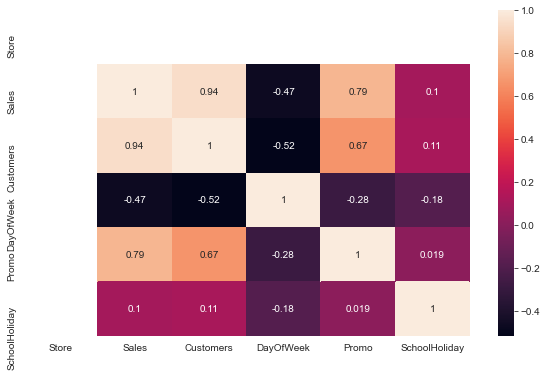

In [362]:
plt.figure(figsize=[10,6])
sns.heatmap(store_ts[1].corr(),annot=True)
plt.show()

observation:
    Very high correlation between Sales and Customers
    Good correlation between sales and promo

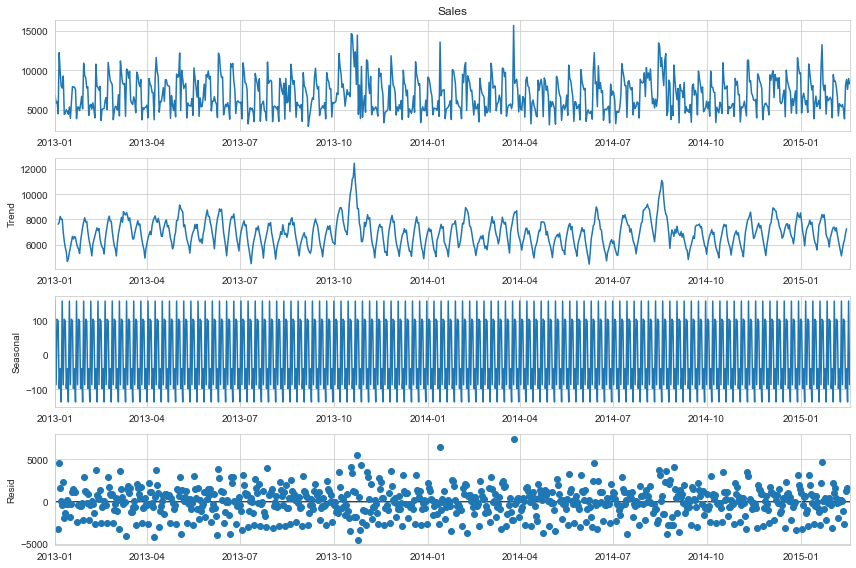

In [363]:
#Decomposition of timeseries data
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']  =12,8
decomposition = sm.tsa.seasonal_decompose(store_ts[1]['Sales'],model = 'additive')
fig = decomposition.plot()
plt.show()

In [364]:
len(store_ts[1])

779

In [365]:
#### Data Preparation

In [366]:
train = store_ts[1][['Sales','Customers','DayOfWeek','Promo','SchoolHoliday','StateHoliday']][:-42]
test = store_ts[1][['Sales','Customers','DayOfWeek','Promo','SchoolHoliday','StateHoliday']][-42:]

In [367]:
# inspect test and train 
len(train), len(test)

(737, 42)

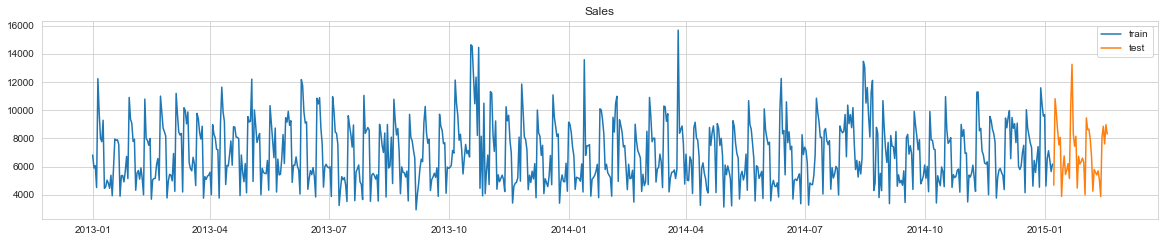

In [368]:
plt.figure(figsize = (20,8))
plt.subplot(211)
plt.plot(train['Sales'],label = 'train')
plt.plot(test['Sales'], label = 'test')
plt.title('Sales')
plt.legend(loc = 'best')

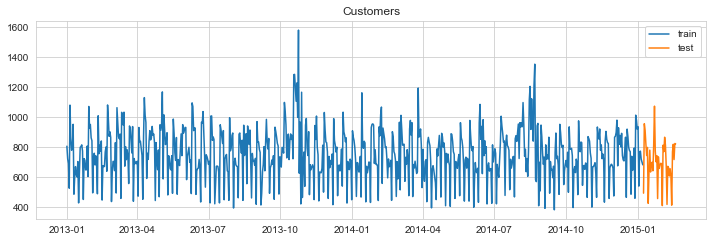

In [369]:
plt.subplot(212)
plt.plot(train['Customers'],label = 'train')
plt.plot(test['Customers'],label = 'test')
plt.title('Customers')
plt.legend(loc = 'best')
plt.show()

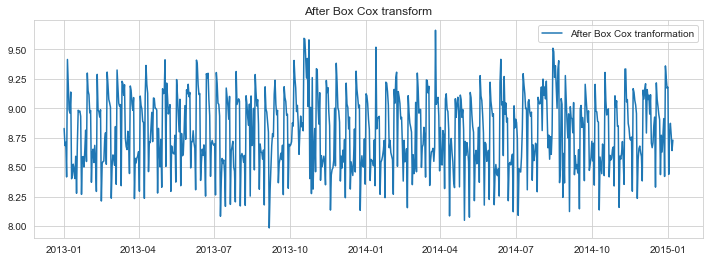

In [370]:
#Standardise the train data
from scipy.stats import boxcox
train_boxcox = pd.DataFrame(boxcox(train['Sales'], lmbda=0), index = train.index, columns=['Sales'])
train_boxcox['Customers'] =  pd.Series(boxcox(train['Customers'], lmbda=0), index = train.index)

# plotting Sales after boxcox transformation
plt.figure(figsize=(12,4))
plt.plot(train_boxcox['Sales'], label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [371]:
# Augmented Dickey Fuller test(ADF)
from statsmodels.tsa.stattools import adfuller


adf_test = adfuller(train_boxcox['Sales'])
print("ADF Test for SALES")
print("ADF Statistics: %.3f" % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Test for SALES
ADF Statistics: -6.415
Critical value @ 0.05: -2.87
p-value: 0.000000


#### Model building

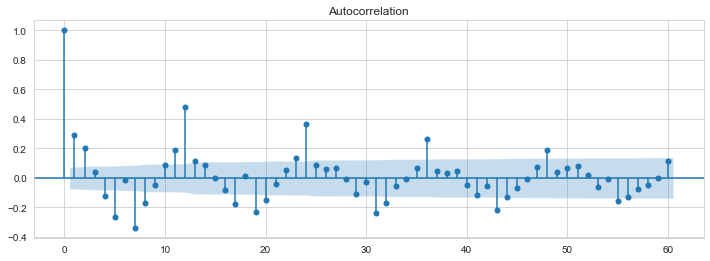

In [372]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(train_boxcox['Sales'], ax=plt.gca(), lags = 60)
plt.show()

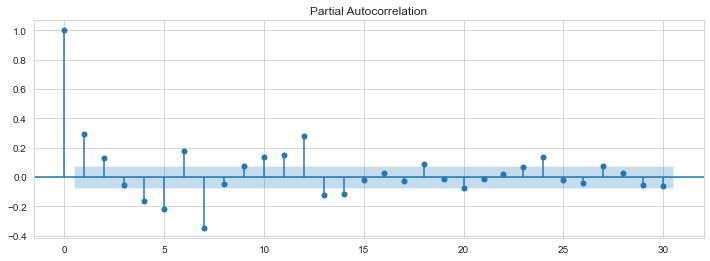

In [373]:
#PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(train_boxcox['Sales'], ax=plt.gca(), lags = 30)
plt.show()

In [374]:
#ARIMA Model
model = ARIMA(train_boxcox['Sales'], order=(4, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  737
Model:                     ARMA(4, 2)   Log Likelihood                -121.852
Method:                       css-mle   S.D. of innovations              0.285
Date:                Sat, 20 Nov 2021   AIC                            259.705
Time:                        22:22:14   BIC                            296.525
Sample:                    01-01-2013   HQIC                           273.904
                         - 01-07-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.7949      0.012    730.332      0.000       8.771       8.818
ar.L1.Sales     1.7762      0.056     31.695      0.000       1.666       1.886
ar.L2.Sales    -1.0014      0.086    -11.679    

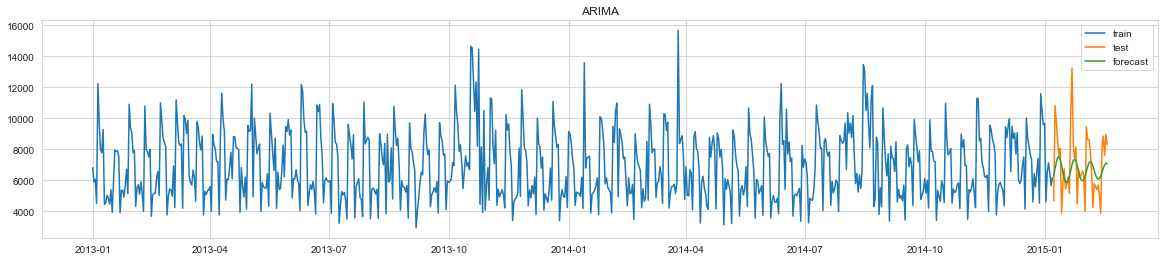

In [375]:
#Recover the original time series
y_hat_ar = store_ts[1]['Sales'].copy()
y_hat_ar['ar_forecast_boxcox'] = model_fit.predict(start = test.index.min(), end = test.index.max())
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

graph(y_hat_ar['ar_forecast'],"ARIMA")

In [376]:
#calculatinf RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)
print('The Root mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))
tempResults = pd.DataFrame({'Method':['Store_3_ARIMA '],'MAPE': [mape]})
results = pd.concat([results, tempResults])

The Root mean Squared Error of our forecasts is 1874.04
The Mean Absolute Percentage Error of our forecasts is 20.49


In [377]:
#VAR model
mod = sm.tsa.VARMAX(train_boxcox[['Sales', 'Customers']], order=(3,0), trend='n')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  737
Model:                             VAR(3)   Log Likelihood                 778.697
Date:                    Sat, 20 Nov 2021   AIC                          -1527.394
Time:                            22:23:30   BIC                          -1458.355
Sample:                        01-01-2013   HQIC                         -1500.770
                             - 01-07-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):              636.51, 154.67   Jarque-Bera (JB):          29.43, 2.89
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.24
Heteroskedasticity (H):         0.87, 1.15   Skew:                     -0.42, -0.12
Prob(H) (two-sided):            0.27, 0.28   Kurtosis:                   3.51, 3.18


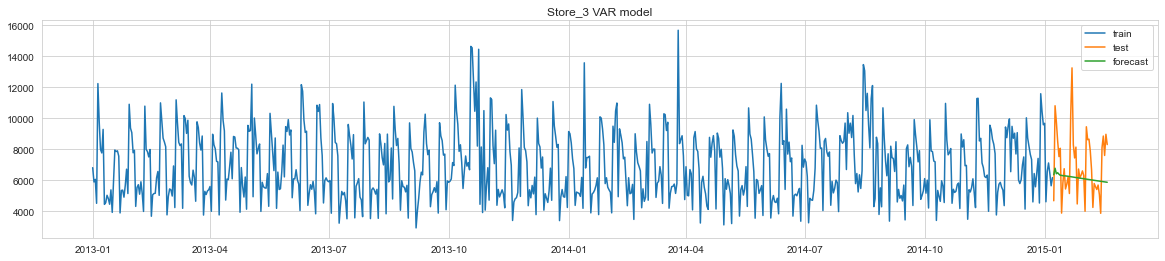

In [378]:
start_index = test['Sales'].index.min()
end_index = test['Sales'].index.max()
y_hat_var = mod.fit().predict(start=start_index, end=end_index)
y_hat_var = np.exp(y_hat_var)
graph(y_hat_var['Sales'],"Store_3 VAR model")

In [379]:
#Calculating RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_var['Sales'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_var['Sales'][test.index.min():])/test['Sales'])*100,2)
print('The Root mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))

tempResults = pd.DataFrame({'Method':['Store_3_VAR'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])

The Root mean Squared Error of our forecasts is 2179.65
The Mean Absolute Percentage Error of our forecasts is 23.22


In [380]:
#VARMAX
exog = train['SchoolHoliday']
mod_varmax = sm.tsa.VARMAX(train_boxcox[['Sales', 'Customers']],exog= exog, order=(5,3), trend='c')
resmax = mod_varmax.fit(maxiter=1000, disp=False)
print(resmax.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  737
Model:                        VARMAX(5,3)   Log Likelihood                1028.150
                              + intercept   AIC                          -1978.301
Date:                    Sat, 20 Nov 2021   BIC                          -1798.800
Time:                            22:39:01   HQIC                         -1909.079
Sample:                        01-01-2013                                         
                             - 01-07-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):               345.23, 64.33   Jarque-Bera (JB):          6.66, 21.24
Prob(Q):                        0.00, 0.01   Prob(JB):                   0.04, 0.00
Heteroskedasticity (H):         0.91, 1.23   Skew:                     -0.20, -0.22
P

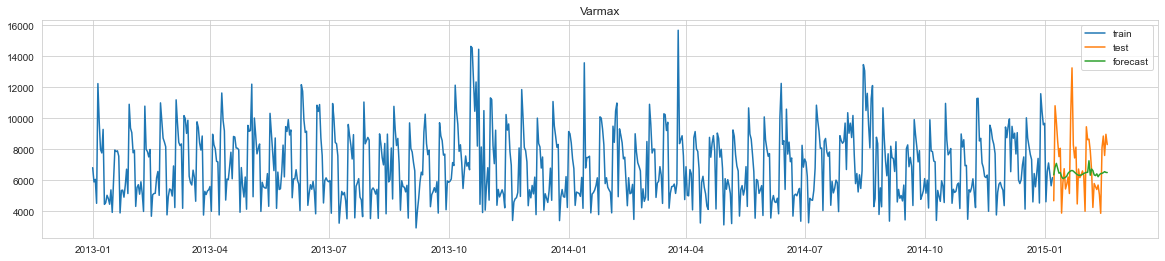

In [381]:
start_index = test['Sales'].index.min()
end_index = test['Sales'].index.max()
#y_hat_varmax = resmax.predict(start=start_index, end=end_index,exog = exog[-42:])
y_hat_varmax = resmax.predict(start=start_index, end=end_index,exog = np.array(exog[-42:]).reshape(42,1))
y_hat_varmax = np.exp(y_hat_varmax)
graph(y_hat_varmax['Sales'],"Varmax")


In [382]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_varmax['Sales'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_varmax['Sales'][test.index.min():])/test['Sales'])*100,2)
print('The Root mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
print('The Mean Absolute Percentage Error of our forecasts is {}'.format(round(mape, 2)))
tempResults = pd.DataFrame({'Method':['Store_3_VARMAX_SchoolHoliday'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])

The Root mean Squared Error of our forecasts is 1993.73
The Mean Absolute Percentage Error of our forecasts is 22.34
